# Data Paths and Prep

### Paths

In [ ]:
# Kaja von Volkmann
ATAC_seq_path = ""
RNA_seq_path = ""
Transcription_exons_path = ""
Cell_population_qc_path = ""
Voluntary_path = ""

In [ ]:
# Pia Kentschke
ATAC_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/RNA-seq_data.csv"
Transcription_exons_path = "/Users/piakentschke/Documents/Uni/Data Analysis/refFlat.txt"
Cell_population_qc_path = "/Users/piakentschke/Documents/Uni/Data Analysis/mmc1.xlsx"
Voluntary_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllTFmotifsInOCRs.txt"

In [ ]:
# Helen Mennenoeh
ATAC_seq_path = ""
RNA_seq_path = ""
Transcription_exons_path = ""
Cell_population_qc_path = ""
Voluntary_path = ""

In [3]:
# Laila Frisius
ATAC_seq_path = "/Users/laila/github/bioinfo25/Raw_data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/bioinfo25/Raw_data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/bioinfo25/Raw_data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/bioinfo25/Raw_data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/bioinfo25/Raw_data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

### Packages

In [4]:
# import of packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os

### Data Sets

In [12]:
# Load data sets
ATAC_seq = pd.read_csv(ATAC_seq_path, keep_default_na=False)
RNA_seq = pd.read_csv(RNA_seq_path)
Cell_population_qc = pd.read_excel(Cell_population_qc_path)

# Create data subsets
col_ATAC_seq_ab_act_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
    'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_act_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']

col_ATAC_seq_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp']

ATAC_seq_ab_act_gd_T = ATAC_seq[col_ATAC_seq_ab_act_gd_T]
ATAC_seq_gd_T = ATAC_seq[col_ATAC_seq_gd_T]
ATAC_seq_ab_act_T = ATAC_seq[col_ATAC_seq_ab_act_T]
ATAC_seq_ab_T = ATAC_seq[col_ATAC_seq_ab_T]

# Data Clean up and Normalization
---

### Set Thresholds

In [ ]:
# Setting thresholds qc metrics
qc_thresholds = {
"%fragment.1Kb_TSS": ("min", 6),
"Paired.read.after.removing.PCR.duplication": ("min", 3000),
"%chrM.mapped": ("max", 5),
"Replicate.cor": ("min", 0),
"InputCellNumber": ("min", 500)
}

# Setting threshold ATAC-seq (p = 0.05)
threshold_pval = 1.3

### Removal of N/A and interfering values

In [ ]:
# QC metrics
    # remove N/A 
qc_clean = Cell_population_qc.copy()
qc_clean = qc_clean.dropna(subset=[
    "%fragment.1Kb_TSS",
    "Paired.read.after.removing.PCR.duplication",
    "%chrM.mapped",
    "Replicate.cor",
    "InputCellNumber"
])

# ATAC-seq
ATAC_seq_clean = ATAC_seq.copy()
    # check for inf values
ATAC_inf = ATAC_seq.isin([np.inf, -np.inf]).sum()
print("Infinite values in ATAC_seq:")
print(ATAC_inf[ATAC_inf > 0])

    # check for NaN values
ATAC_missing = ATAC_seq.isna().sum()
print("NaN in ATAC_seq:")
print(ATAC_missing[ATAC_missing > 0])

    # show rows of infinite -log10 p values
inf_rows = ATAC_seq[ATAC_seq['_-log10_bestPvalue'].isin([np.inf, -np.inf])]

    #drop peaks with infinite -log10 p values
ATAC_seq_clean = ATAC_seq_clean[ATAC_seq['_-log10_bestPvalue'] != np.inf]

    # range of -log10 p-values
pvalues = ATAC_seq_clean["_-log10_bestPvalue"]

min_pval = pvalues.min()
max_pval = pvalues.max()
print(f"Minimum -log10 p-value: {min_pval}")
print(f"Maximum -log10 p-value: {max_pval}")

# RNA-seq
print(RNA_seq.isna().sum().sum())
print((RNA_seq.iloc[:, 1:] < 1).sum().sum())
numerical_data=RNA_seq.iloc[:, 1:]
    #gesamtsumme berechnen
sample_sums=numerical_data.sum(axis=0)
low_sum_samples=sample_sums[sample_sums <= 100]
print(low_sum_samples)
    #varianz berechnen
sample_variance=numerical_data.var(axis=0)
low_variance_samples=sample_variance[sample_variance <= 0.5]
print(low_variance_samples)

### Code for Data Filtering

In [ ]:
metrics = [
    ("%fragment.1Kb_TSS", "TSS enrichment"),
    ("Paired.read.after.removing.PCR.duplication", "nFrags"),
    ("%chrM.mapped", "chrM mapped (%)"),
    ("Replicate.cor", "Replicate correlation"),
    ("InputCellNumber", "Input cell number")
]
fig, axes = plt.subplots(2, len(metrics), figsize=(5*len(metrics), 8))

# Filtering with thresholds
def apply_qc_thresholds (df, qc_thresholds):
    import operator

    mask = pd.Series(True, index = df.index)
    for col, (bound, val) in qc_thresholds.items():
        if bound == "min":
            mask&= df[col] >= val
        elif bound == "max":
            mask&= df[col] <= val
    return df[mask].copy()

In [ ]:
# QC metrics
qc_filtered = apply_qc_thresholds(qc_clean, qc_thresholds)

# Filter ATAC-seq peaks based on logp value threshold 
ATAC_seq_filtered = ATAC_seq_clean[ATAC_seq_clean["_-log10_bestPvalue"] >= threshold_pval]

In [ ]:
# Extract the peakID column 
peak_id_col = ATAC_seq_filtered[["ImmGenATAC1219.peakID"]]

# Extract the accessibility score columns
score_cols = ATAC_seq_filtered.loc[:, "LTHSC.34-.BM":]
score_abgd = ATAC_seq_filtered[col_ATAC_seq_ab_act_gd_T]

# Create data frame with only scores per peak
ATAC_scores = pd.concat([peak_id_col, score_cols], axis=1)

### Normalization

In [ ]:
RNA_seq_log2=RNA_seq.copy()
RNA_seq_log2.iloc[:, 1:]=np.log2(RNA_seq.iloc[:, 1:])

In [ ]:
# log2-transformation
peak_signal_log = np.log2(score_abgd+1)
spaltenpositionen = [peak_signal_log.columns.get_loc(name) for name in col_ATAC_seq_ab_T]

# Exploratory Data
---

In [ ]:
# Plotting of data qc
for i, (col, label) in enumerate(metrics):
    sns.violinplot(y=qc_clean[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"{label}\n(raw data)")
    sns.violinplot(y=qc_filtered[col], ax=axes[1,i], color= 'lightgreen')
    axes[1,i].set_title(f"{label}\n(filtered data)")

plt.tight_layout()
plt.show()

In [ ]:
# Extract the peakID column 
peak_id_col = ATAC_seq_filtered[["ImmGenATAC1219.peakID"]]

# Extract the accessibility score columns
score_cols = ATAC_seq_filtered.loc[:, "LTHSC.34-.BM":]

# Create data frame with only scores per peak
ATAC_scores = pd.concat([peak_id_col, score_cols], axis=1)

# calculate mean accessibility score for each peak
mean_accessibility_per_peak = ATAC_scores.mean(axis=1, numeric_only=True)

# calculate median accessibility score for each peak
median_accessibility_per_peak = ATAC_scores.median(axis=1, numeric_only=True)

# calculate standard deviation of accessibility scores for each peak
sd_accessibility_per_peak = ATAC_scores.std(axis=1, numeric_only=True)

# variance within cell type
variance_within_cell = ATAC_scores.var(axis = 0, numeric_only = True)

# variance across cell types (for each peak)
variance_across_cells = ATAC_scores.var(axis = 1, numeric_only=True)

# create summary data frame
mean_med_sd_df = pd.DataFrame({
    "Mean Accessibility": mean_accessibility_per_peak,
    "Median Accessibility": median_accessibility_per_peak,
    "Standard Deviation": sd_accessibility_per_peak,
    "Variance across cells": variance_across_cells,
})

#print(ATAC_scores)
#print(mean_accessibility_per_peak)
#print(mean_med_sd_df)
print(mean_med_sd_df)
print(variance_within_cell)



### PCA RNA-seq

In [ ]:
#ohne gennamen
data=RNA_seq_log2.iloc[:, 1:]
#auswahl der 1000 variablesten gene
variances=data.var(axis=1)
top_genes=variances.nlargest(1000).index
#transponieren
data_T=data.T
#mittelwertzentrierung?
data_centered=data_T-data_T.mean(axis=0)
# matrix mit Kovarianz
cov_matrix=np.cov(data_centered, rowvar=False)
# Eigenwerte und Eigenvektoren
eig_vals, eig_vecs=np.linalg.eigh(cov_matrix)
# ansteigend sortieren
sorted_idx=np.argsort(eig_vals)[::-1]
eig_vals=eig_vals[sorted_idx]
eig_vecs=eig_vecs[:, sorted_idx]
#ersten zwei PCs
pc1=data_centered @ eig_vecs[:, 0]
pc2=data_centered @ eig_vecs[:, 1]
#plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
#achsen labeln
for i, sample in enumerate(data_T.index):
    plt.text(pc1[i] + 0.2, pc2[i], sample, fontsize=9)

plt.xlabel(f"PC1 ({eig_vals[0]/eig_vals.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eig_vals[1]/eig_vals.sum()*100:.1f}%)")
plt.title("PCA der RNA-Seq Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

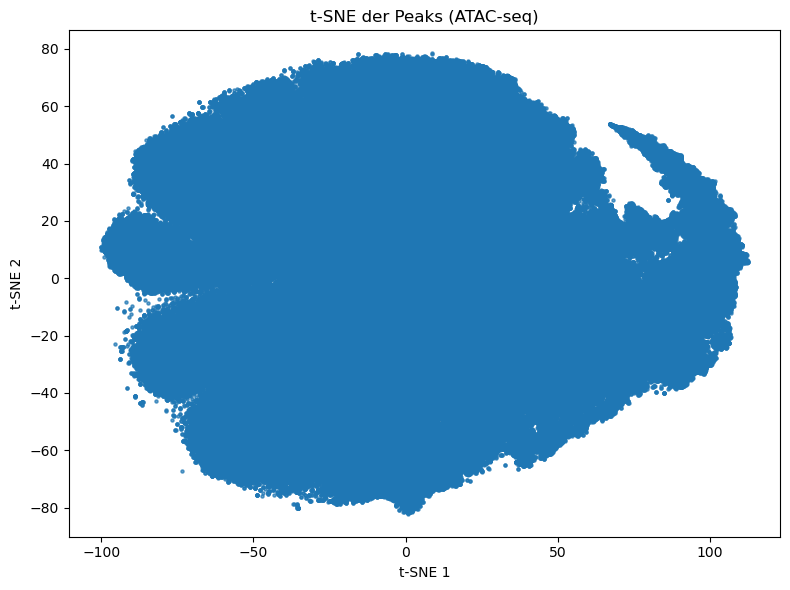

In [ ]:
# Matrix für t-SNE
M_tSNE_peaks = np.array(peak_signal_log)
M_tSNE_small = M_tSNE_peaks[:100,:4]
M_tSNE_ab_T = M_tSNE_peaks[:, spaltenpositionen]

# test t-SNE
#tsne_peaks_small = sklm.TSNE(n_components = 2, perplexity=30, random_state=42)
#M_tSNE_test = tsne_peaks_small.fit_transform(M_tSNE_small)

# t-SNE ab
tsne_peaks_ab_T = sklm.TSNE(n_components = 2, perplexity=30, random_state=42)
M_tSNE_ab_T = tsne_peaks_ab_T.fit_transform(M_tSNE_ab_T)

# t-SNE
# tsne_peaks = sklm.TSNE(n_components=2, perplexity=30, random_state=42)
# M_tSNE_peaks_embedded = tsne_peaks.fit_transform(M_tSNE_peaks)

plt.figure(figsize=(8,6))
plt.scatter(M_tSNE_ab_T[:,0], M_tSNE_ab_T[:,1], s=5, alpha=0.7)
plt.title('t-SNE der Peaks (ATAC-seq)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

# Discriptive and Comparative Analysis

# Statistical Analysis and Regression Models